In [13]:
import os
import random
import numpy as np
import PIL
from PIL import Image
from builtins import range


def read_images (path , sz=None):
    c = 0
    X,y = [], []
    for  dirname , dirnames , filenames  in os.walk(path):
        for  subdirname  in  dirnames:
            subject_path = os.path.join(dirname , subdirname)
            for  filename  in os.listdir(subject_path):
                try:
                    im = Image.open(os.path.join(subject_path , filename))
                    #im = im.convert("L")
# resize  to  given  size (if  given)
                    if (sz is not  None):
                        im = im.resize(sz, Image.ANTIALIAS)
                    X.append(np.asarray(im , dtype=np.uint8))
                    y.append(c)
                except  IOError:
                    print "I/O error ({0}): {1}".format(errno , strerror)
                except:
                    print "Unexpected  error:", sys.exc_info ()[0]
                    raise
            c = c+1
    return [X,y]

def asRowMatrix(X):
    """
    Creates a row-matrix from multi-dimensional data items in list l.
    
    X [list] List with multi-dimensional data.
    """
    if len(X) == 0:
        return np.array([])
    total = 1
    for i in range(0, np.ndim(X[0])):
        total = total * X[0].shape[i]
    mat = np.empty([0, total], dtype=X[0].dtype)
    for row in X:
        mat = np.append(mat, row.reshape(1,-1), axis=0) # same as vstack
    return np.asmatrix(mat)

def asColumnMatrix(X):
    """
    Creates a column-matrix from multi-dimensional data items in list l.
    
    X [list] List with multi-dimensional data.
    """
    if len(X) == 0:
        return np.array([])
    total = 1
    for i in range(0, np.ndim(X[0])):
        total = total * X[0].shape[i]
    mat = np.empty([total, 0], dtype=X[0].dtype)
    for col in X:
        mat = np.append(mat, col.reshape(-1,1), axis=1) # same as hstack
    return np.asmatrix(mat)


def minmax_normalize(X, low, high, minX=None, maxX=None, dtype=np.float):
    """ min-max normalize a given matrix to given range [low,high].
    
    Args:
        X [rows x columns] input data
        low [numeric] lower bound
        high [numeric] upper bound
    """
    if minX is None:
        minX = np.min(X)
    if maxX is None:
        maxX = np.max(X)
    minX = float(minX)
    maxX = float(maxX)
    # Normalize to [0...1].    
    X = X - minX
    X = X / (maxX - minX)
    # Scale to [low...high].
    X = X * (high-low)
    X = X + low
    return np.asarray(X, dtype=dtype)

def zscore(X):
    X = np.asanyarray(X)
    mean = X.mean()
    std = X.std() 
    X = (X-mean)/std
    return X, mean, std

def shuffle(X,y):
    idx = np.argsort([random.random() for i in range(y.shape[0])])
    return X[:,idx], y[idx]

def shuffle_array(X,y):
    """ Shuffles two arrays!
    """
    idx = np.argsort([random.random() for i in range(len(y))])
    X = [X[i] for i in idx]
    y = [y[i] for i in idx]
    return (X, y)


In [14]:
def  pca(X, y, num_components =0):
    [n,d] = X.shape
    if (num_components  <= 0) or (num_components >n):
        num_components = n
    mu = X.mean(axis =0)
    X = X - mu
    if n>d:
        C = np.dot(X.T,X)
        [eigenvalues ,eigenvectors] = np.linalg.eigh(C)
    else:
        C = np.dot(X,X.T)
        [eigenvalues ,eigenvectors] = np.linalg.eigh(C)
        eigenvectors = np.dot(X.T,eigenvectors)
        for i in  xrange(n):
            eigenvectors [:,i] = eigenvectors [:,i]/np.linalg.norm(eigenvectors [:,i])

# sort  eigenvectors  descending  by  their  eigenvalue
    idx = np.argsort(-eigenvalues)
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors [:,idx]
# select  only  num_components
    eigenvalues = eigenvalues [0: num_components ].copy()
    eigenvectors = eigenvectors [:,0: num_components ].copy()
    return [eigenvalues , eigenvectors , mu]

In [15]:
def  project(W , X , mu = None ):
    if mu is None :
        return np . dot (X , W )
    return np . dot ( X - mu , W )
def  reconstruct(W, Y, mu=None):
    if mu is None:
        return  np.dot(Y,W.T)
    return  np.dot(Y, W.T) + mu

In [16]:
import numpy as np
import matplotlib . pyplot as plt
import matplotlib . cm as cm

def create_font(fontname ='Tahoma ', fontsize =10) :
    return { 'fontname': fontname , 'fontsize': fontsize }

def subplot ( title , images , rows , cols , sptitle = " subplot " , sptitles =[] , colormap = cm.gray , ticks_visible = True , filename = None ) :
    fig = plt . figure ()
# main title
    fig . text (.5 , .95 , title , horizontalalignment='center')
    for i in xrange ( len ( images ) ) :
        ax0 = fig . add_subplot ( rows , cols ,( i +1) )
        plt . setp(ax0.get_xticklabels() , visible = False )
        plt . setp(ax0.get_yticklabels() , visible = False )
        if len ( sptitles ) == len ( images ) :
            plt . title ( " % s #% s " % ( sptitle , str ( sptitles [ i ]) ) , create_font ( 'Tahoma' ,10) )
        else :
            plt . title ( " % s #% d " % ( sptitle , ( i +1) ) , create_font ( 'Tahoma' ,10) )
        plt . imshow ( np . asarray ( images [ i ]) , cmap = colormap )
    if filename is None :
        plt . show ()
    else :
        fig . savefig ( filename )

In [17]:
import sys
# append tinyfacerec to module search path
# import numpy and matplotlib colormaps
import numpy as np
# import tinyfacerec modules
#from tinyfacerec . subspace import pca
#from tinyfacerec . util import normalize , asRowMatrix , read_images
#from tinyfacerec . visual import subplot
# read images
[X , y ] = read_images("/home/pramod/facerec_data/AT&T")
print X[0].shape

# perform a full pca
[D , W , mu ] = pca( asRowMatrix( X ) , y )
print W.shape

(112, 92)
(10304, 395)


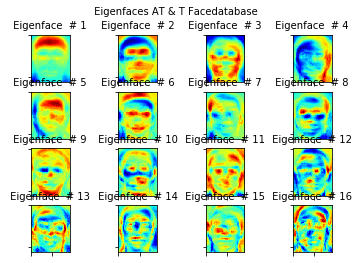

In [18]:
import matplotlib . cm as cm
# turn the first ( at most ) 16 eigenvectors into grayscale
# images ( note : eigenvectors are stored by column !)
a=[i for i in xrange(min(len(X),16))]
E = []
for i in xrange ( min ( len ( X ) , 16) ) :
    e = W [: , i ]. reshape ( X [0]. shape )
    E . append (minmax_normalize (e ,0 ,255) )
# plot them and store the plot to " p y t h o n _ e i g e n f a c e s . pdf "
subplot (title = " Eigenfaces AT & T Facedatabase " , images=E, rows =4 , cols =4 , sptitle = "Eigenface " , colormap = cm . jet , filename = None )

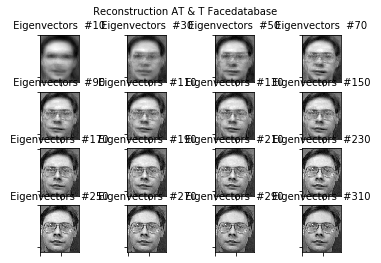

In [19]:
import matplotlib . cm as cm

# recons truction steps
steps=[i for i in xrange( 10, min ( len ( X ) , 320) , 20) ]
E = []
for i in xrange ( min ( len ( steps ) , 16) ) :
    numEvs = steps [ i ]
    P = project( W [: ,0: numEvs ] , X [0]. reshape (1 , -1) , mu )
    R = reconstruct( W [: ,0: numEvs ] , P , mu )
# reshape and append to plots
    R = R . reshape ( X [0]. shape )
    E . append (minmax_normalize(R ,0 ,255) )
# plot them and store the plot to " p y t h o n _ r e c o n s t r u c t i o n . pdf "
subplot (title = " Reconstruction AT & T Facedatabase " , images=E, rows =4 , cols =4 , sptitle = "Eigenvectors ",sptitles =steps , colormap = cm . gray , filename = None)    


In [20]:
import  numpy  as np
from sklearn.model_selection import train_test_split


class  AbstractDistance(object):
    def  __init__(self , name):
        self._name = name
    def  __call__(self ,p,q):
        raise  NotImplementedError("Every  AbstractDistance  must  implement  the  __call__method.")
    @property
    def  name(self):
        return  self._name
    def  __repr__(self):
        return  self._name
class  EuclideanDistance(AbstractDistance):
    def  __init__(self):
        AbstractDistance.__init__(self ,"EuclideanDistance")
    def  __call__(self , p, q):
        p = np.asarray(p).flatten ()
        q = np.asarray(q).flatten ()
        return  np.sqrt(np.sum(np.power ((p-q) ,2)))
class  CosineDistance(AbstractDistance):
    def  __init__(self):
        AbstractDistance.__init__(self ,"CosineDistance")
    def  __call__(self , p, q):
        p = np.asarray(p).flatten ()
        q = np.asarray(q).flatten ()
        return  -np.dot(p.T,q) / (np.sqrt(np.dot(p,p.T)*np.dot(q,q.T)))

In [21]:
import  numpy  as np


class  BaseModel(object):
    def  __init__(self , X=None , y=None , dist_metric=EuclideanDistance (), num_components=0):
        self.dist_metric = dist_metric
        self.num_components = 0
        self.projections = []
        self.W = []
        self.mu = []
        if (X is not  None) and (y is not  None):
            self.compute(X,y)
    def  compute(self , X, y):
        raise  NotImplementedError("Every  BaseModel  must  implement  the  compute  method.")
    def  predict(self,X):
            #minDist = np.finfo('float').max
            #minClass =  -1
            
            
            
            self.Q=[]
            for xi in X:
                self.Q.append(project(self.W, xi.reshape (1,-1), self.mu))
            #print self.projections[1].shape
            #print self.Q[0].shape
            
            
            #print self.projections[0].shape
            AX=np.array(self.projections)
            
            inp=np.array(self.Q)
            inp=inp.reshape((inp.shape[0], -1), order='F')
            print inp.shape
            AX=AX.reshape((AX.shape[0], -1), order='F')
  
            from time import time
            import logging
            import matplotlib.pyplot as plt
            from sklearn.model_selection import GridSearchCV
            from sklearn.datasets import fetch_lfw_people
            from sklearn.metrics import classification_report
            from sklearn.metrics import confusion_matrix
            from sklearn.decomposition import PCA
            from sklearn.svm import SVC
            from sklearn import svm
            
            print("Fitting the classifier to the training set")
            t0 = time()
            param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5], 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
            clf = GridSearchCV(SVC(kernel='linear', class_weight='balanced'), param_grid)
            clf = clf.fit(AX, y_train)
            print("done in %0.3fs" % (time() - t0))
            print("Best estimator found by grid search:")
            print(clf.best_estimator_)
            print("Predicting people's names on the test set")
            t0 = time()
            y_pred = clf.predict(inp)
            print y_pred
            print y_test
            #print y_test[11]
            print("done in %0.3fs" % (time() - t0))
            target_names=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','AA','BB','CC','DD','EE','FF','II','JJ','KK','LL','MM','NN','OO','PP']
            n_classes=40
            print(classification_report(y_test, y_pred, target_names=target_names))
            print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))
            from matplotlib.pyplot import figure, imshow, axis
            from matplotlib.image import imread
            print X[0].shape
            w,h=92,112
           
            def plot_gallery(new,images, titles, h, w, n_row=3, n_col=4):
                """Helper function to plot a gallery of portraits"""
                plt.subplots_adjust(bottom=0.4, left=.01, right=.59, top=.50, hspace=.35)
                for i in range(n_row * n_col):
                    plt.figure(figsize=(5.8 * n_col, 6.4 * n_row))
                    plt.subplot(n_row, n_col, i + 1)
                    plt.title(titles[i], size=25)
                    plt.imshow(new[i].reshape((h,w)), cmap=plt.cm.gray)
                    plt.figure(figsize=(5.8 * n_col, 6.4 * n_row))
                    plt.subplot(n_row, n_col, i + 1)
                    plt.imshow(images[i].reshape((h,w)), cmap=plt.cm.gray)
                    

# plot the result of the prediction on a portion of the test set

            def title(y_pred, ytest, target_names, i):
                pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
                true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
                return ' \n\n\n\n\npredicted: %s\ntrue:      %s' % (pred_name, true_name)

            prediction_titles = [title(y_pred, y_test , target_names, i) for i in range(y_pred.shape[0])]
            
            xp=X[0:len(y_pred)]
            xt=X[0:len(y_test)]
            for i in range(len(y_pred)):
                xp[i]=X[y_pred[i]]
                xt[i]=X_test[y_test[i]]    
            plot_gallery(xp ,X_test, prediction_titles, h,w )
        
            plt.show()

     
            '''for i in  xrange(len(self.projections)):
                dist = self.dist_metric(self.projections[i], Q)
                if dist < minDist:
                    minDist = dist
                    minClass = self.y[i]
            return minClass'''

In [22]:
class EigenfacesModel( BaseModel ) :
    def  __init__(self , X=None , y=None , dist_metric=EuclideanDistance (), num_components=0):
        super(EigenfacesModel , self).__init__(X=X,y=y,dist_metric=dist_metric ,num_components=num_components)
    def  compute(self , X, y):
        [D, self.W, self.mu] = pca(asRowMatrix(X),y, self.num_components)
# store  labels
        self.y = y
# store  projections
        for xi in X:
            self.projections.append(project(self.W, xi.reshape (1,-1), self.mu))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27,

/home/pramod/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


done in 0.691s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Predicting people's names on the test set
[ 7 31 25  5 39 16  4 23 32 33 24  9  2 39 26 31 12 27  2 33  3 39 17 24 33
 33  7  3 10  7 31 38 29 36  9 31 13  5 19  2  7 33 33 33 16  9  4 26 10 19
  3  5  3 38 39 13  9 17  2  3  9 19 16 24 24 21 25 19 32 24  4  8 29 33 36
 31 33 24 32 21 19 31 10 25 37 33 38 23 34 13 32 15 24 37 37 21  7 10 24  1
 23  9 24  1 26 35 37  3 32 19 38 31 23  7 28 24 25 16 10  1 16  9 12 35 17
 27 24 24 31 26 26 17  3 39 20 16 15  2  3 29 15 35 38  5  3 33 25 24  9 27
 15  1 19 10 31 34 37 20 35 16 26 31 20 15  3  9 10 27  9 33 26  9 33 23  2
  3 33 27 10 21 21 21 10 21 16 10 23  8 33 16 33 19 27 26 21 33 31 34 21 16
  3  1 27 21 23 33 38 26 28  3 31 35 38  9 36 16 25 13 15 20 2

/home/pramod/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/pramod/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


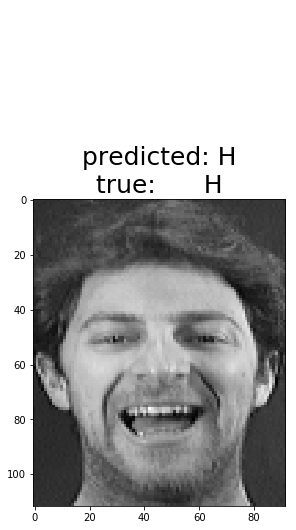

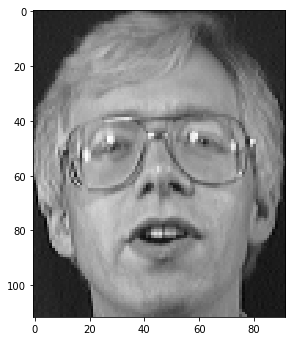

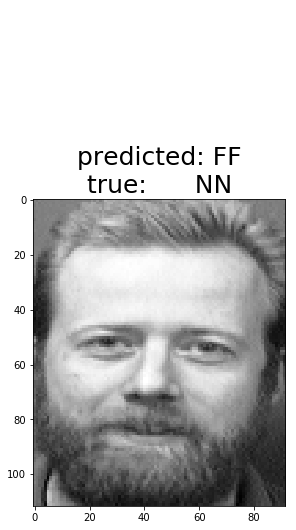

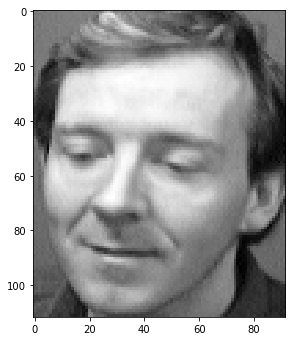

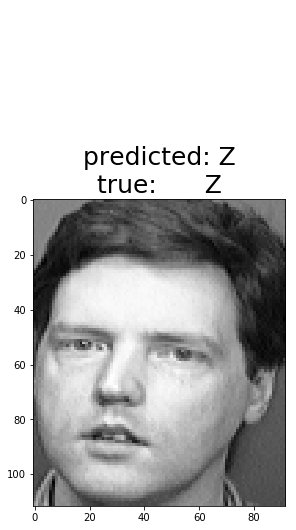

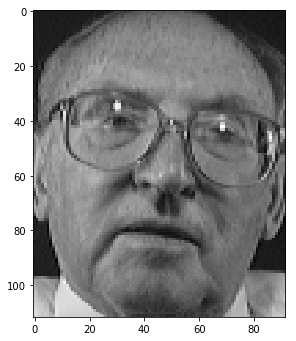

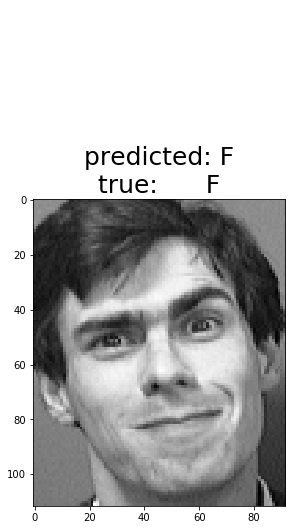

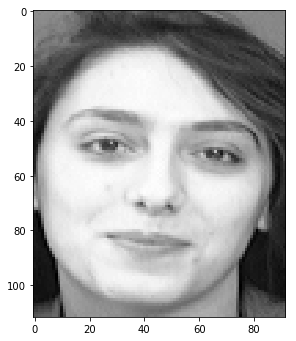

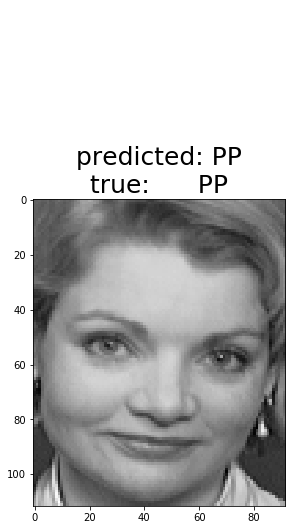

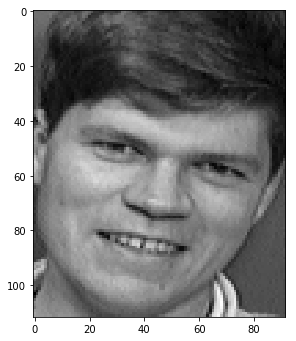

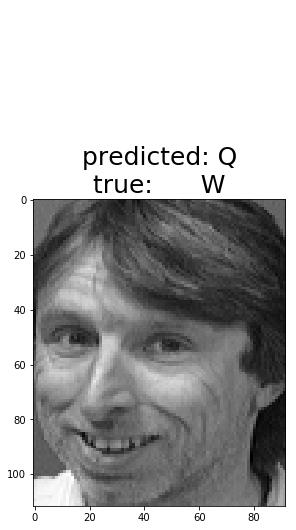

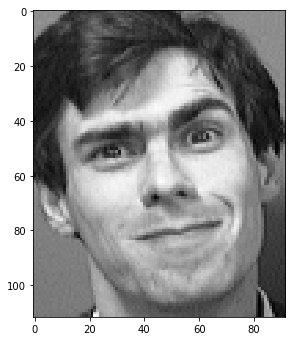

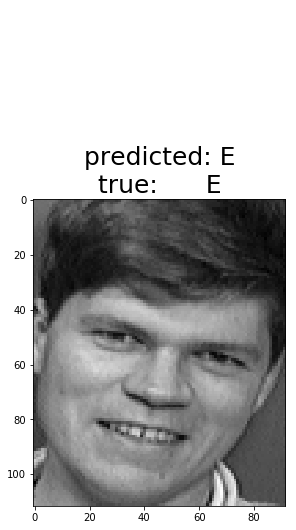

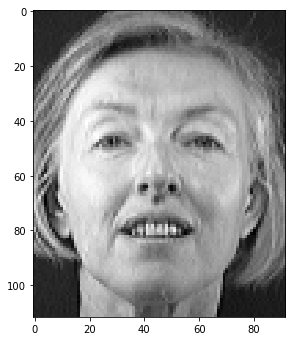

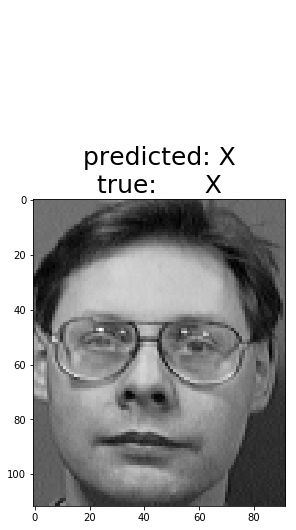

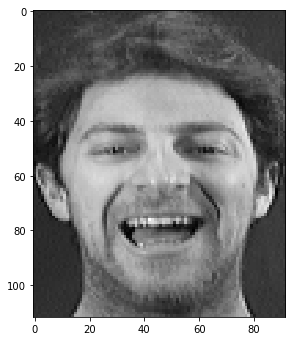

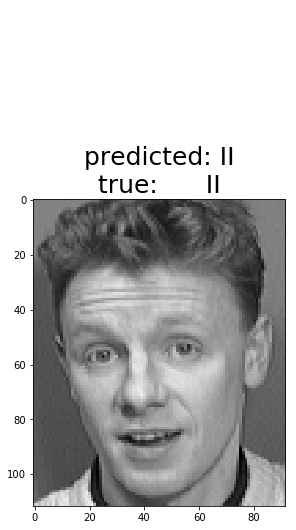

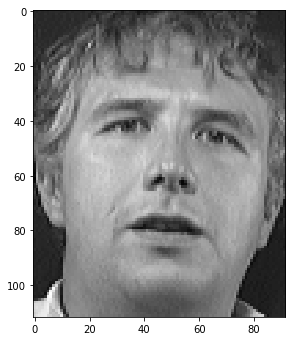

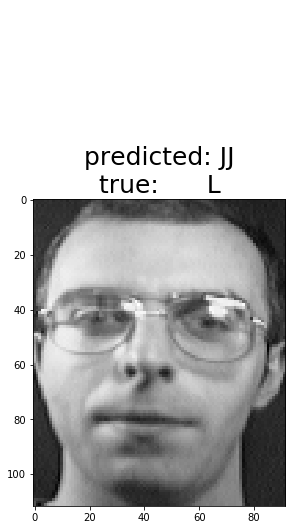

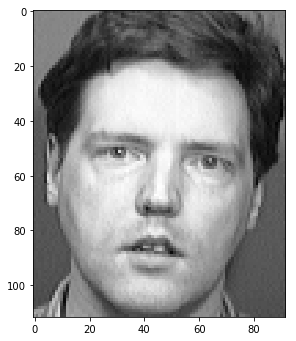

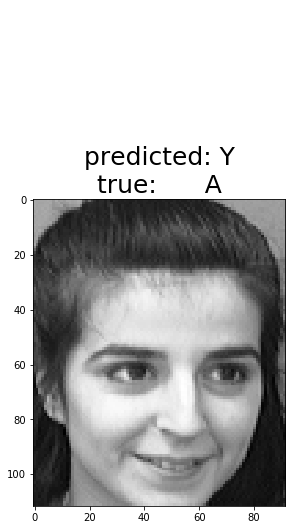

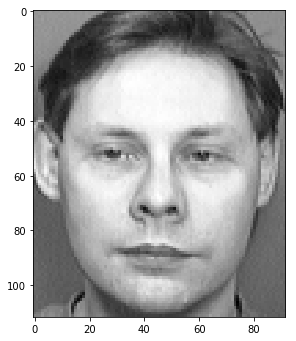

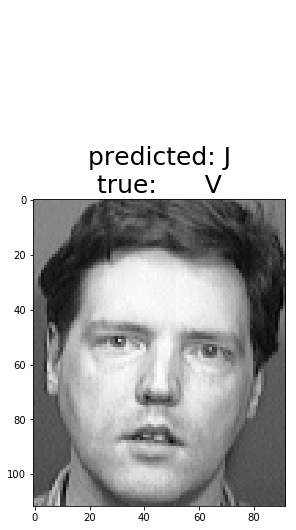

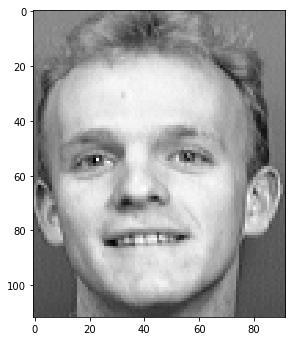

In [23]:
import sys
import matplotlib . cm as cm
from sklearn.model_selection import train_test_split

# append tinyfacerec to module search path
# import numpy and matplotlib colormaps
import numpy as np
# import tinyfacerec modules
# read images
[X , y ] =(read_images( "/home/pramod/facerec_data/AT&T" ))
print y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.85, random_state=42)

model = EigenfacesModel( X_train, y_train)


model . predict(X_test)


# get a prediction for the first observation
#print " expected = " , y_test , " / " , " predicted = " , model . predict(X_test)







